In [47]:
#import dependecies
import pandas as pd
import numpy as np
import os
import PIL
from PIL import Image
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image, SVG
import tensorflow as tf
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

In [48]:
#importing csv
Image_Paths_df = pd.read_csv('Transformed_Valid_Data/Image_paths.csv')
Image_Paths_df.head()

Image_Path
0  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4  MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...

In [72]:
len(Image_Paths_df)

3198

In [77]:
Seperated_Path_df = pd.read_csv('Transformed_Valid_Data/seperated_path.csv')
Seperated_Path_df.head()

Folder Data_Type Xray_Type       Patient    Study_Outcome       Image
0  MURA-v1.1     valid  XR_WRIST  patient11185  study1_positive  image1.png
1  MURA-v1.1     valid  XR_WRIST  patient11185  study1_positive  image2.png
2  MURA-v1.1     valid  XR_WRIST  patient11185  study1_positive  image3.png
3  MURA-v1.1     valid  XR_WRIST  patient11185  study1_positive  image4.png
4  MURA-v1.1     valid  XR_WRIST  patient11186  study1_positive  image1.png

In [78]:
len(Seperated_Path_df)

3198

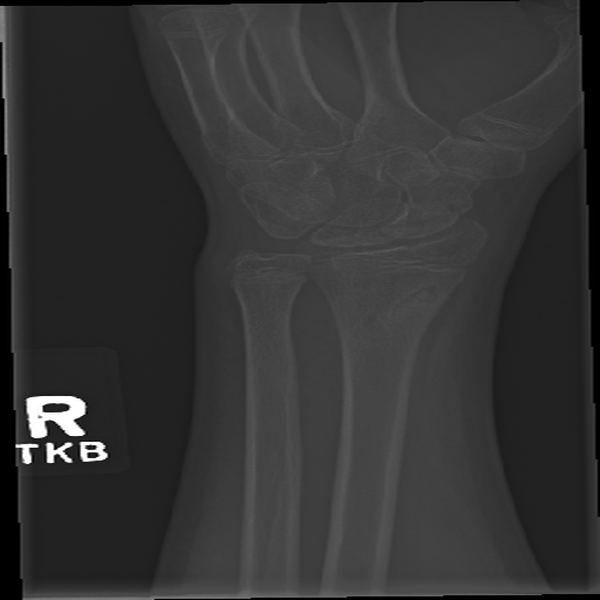

In [79]:
path_for_one = Image_Paths_df['Image_Path'][1]
img = PIL.Image.open(path_for_one)
img = img.resize((600,600), PIL.Image.LANCZOS)
img_array = np.asarray(img)
img

In [80]:
img.mode

'L'

In [81]:
img_array.shape

(600, 600)

In [83]:
paths = Image_Paths_df['Image_Path']

In [84]:
img_array_data = []

def creating_array_img_data():
    for path in paths:
        img = PIL.Image.open(path_for_one)
        img = img.resize((600,600), PIL.Image.LANCZOS)
        img_array = np.asarray(img)
        img_array_data.append([new_array])

creating_array_img_data()

In [58]:
print(len(img_array_data))

3198


In [98]:
raw_results_df = Seperated_Path_df.drop(
    Seperated_Path_df.columns[[0,1,3,5]], axis=1)
raw_results_df.head()

Xray_Type    Study_Outcome
0  XR_WRIST  study1_positive
1  XR_WRIST  study1_positive
2  XR_WRIST  study1_positive
3  XR_WRIST  study1_positive
4  XR_WRIST  study1_positive

In [99]:
len(raw_results_df)

3198

In [100]:
len(img_array_data)

3198

In [101]:
raw_results_df['Images'] = img_array_data

In [102]:
raw_results_df.head()

Xray_Type    Study_Outcome  \
0  XR_WRIST  study1_positive   
1  XR_WRIST  study1_positive   
2  XR_WRIST  study1_positive   
3  XR_WRIST  study1_positive   
4  XR_WRIST  study1_positive   

                                              Images  
0  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...  
1  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...  
2  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...  
3  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...  
4  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...

In [103]:
body_part_df = raw_results_df.drop(['Study_Outcome'], axis=1)
body_part_df.head()

Xray_Type                                             Images
0  XR_WRIST  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...
1  XR_WRIST  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...
2  XR_WRIST  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...
3  XR_WRIST  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...
4  XR_WRIST  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...

In [105]:
dummy_body_part_df = pd.get_dummies(body_part_df, prefix=['Xray_Type'], columns=['Xray_Type'])
dummy_body_part_df.head()

Images  Xray_Type_XR_ELBOW  \
0  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...                   0   
1  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...                   0   
2  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...                   0   
3  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...                   0   
4  [[[[0 0 0], [0 0 0], [0 0 0], [0 0 0], [0 0 0]...                   0   

   Xray_Type_XR_FINGER  Xray_Type_XR_FOREARM  Xray_Type_XR_HAND  \
0                    0                     0                  0   
1                    0                     0                  0   
2                    0                     0                  0   
3                    0                     0                  0   
4                    0                     0                  0   

   Xray_Type_XR_HUMERUS  Xray_Type_XR_SHOULDER  Xray_Type_XR_WRIST  
0                     0                      0                   1  
1                     0                      0                   1  
2                     0                      0                   1  
3                     0                      0                   1  
4                     0                      0                   1

In [42]:
# Keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.datasets import mnist

Using TensorFlow backend.


In [44]:
(X_train, y_train), X_test, y_test) = XRay_Study_df
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

ValueError: too many values to unpack (expected 2)